In [40]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer#necessary, although not directly used!
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_1_no_outliers.csv", index_col=0)


We can see that the features of "salary" and "happiness" contain missing values, the latter one only one.

In [41]:
print(base_df.isnull().sum())
print(base_df.describe())

score        0
salary       0
happiness    0
Age          0
dtype: int64
            score         salary   happiness         Age
count  926.000000     926.000000  926.000000  926.000000
mean    50.506479  119148.090006   52.592873   49.890929
std     28.382855   35167.242317   28.619319   17.553624
min      0.000000   13799.436887    1.000000   21.000000
25%     25.000000   94040.699722   21.000000   34.000000
50%     53.000000  118252.938016   60.000000   49.000000
75%     75.000000  144558.610473   80.000000   65.000000
max     99.000000  230507.453485  100.000000   80.000000


We are using the IterativeImputer, which uses the data in all features of the dataset in order to impute the missing values. This method takes the other features as inputs and the missing feature column as output, and builds a regressor in order to predict the missing values. This is great, because the correlations between the features are used in order to make the predictions.


In [33]:
imputer=IterativeImputer(max_iter=20, random_state=SEED)
imputer_train=imputer.fit_transform(base_df)
df_imputed=pd.DataFrame(imputer_train, columns=base_df.columns)
print(df_imputed)



     score         salary  happiness   Age
0     80.0  141890.771857       61.0  62.0
1     47.0  130053.860492       80.0  71.0
2     56.0  102071.794659       40.0  67.0
3     37.0   90975.540309       21.0  27.0
4     70.0  109558.368794       41.0  77.0
..     ...            ...        ...   ...
988    7.0  117026.617736       41.0  63.0
989   26.0   89572.041893       40.0  22.0
990   50.0  120695.809039       41.0  40.0
991   42.0  297158.567626       81.0  79.0
992   51.0  122615.655631       60.0  34.0

[993 rows x 4 columns]


Here, we also do an imputation with the SimpleImputer and the mean, and compare the results to those of the IterativeImputer.

In [34]:


simple_imputer=SimpleImputer(strategy='mean')
simple_imputer_train=simple_imputer.fit_transform(base_df)
df_simple_imputed=pd.DataFrame(simple_imputer_train, columns=base_df.columns)
print(df_simple_imputed)


     score         salary  happiness   Age
0     80.0  141890.771857       61.0  62.0
1     47.0  130053.860492       80.0  71.0
2     56.0  102071.794659       40.0  67.0
3     37.0   90975.540309       21.0  27.0
4     70.0  109558.368794       41.0  77.0
..     ...            ...        ...   ...
988    7.0  117026.617736       41.0  63.0
989   26.0   89572.041893       40.0  22.0
990   50.0  120695.809039       41.0  40.0
991   42.0  297158.567626       81.0  79.0
992   51.0  122615.655631       60.0  34.0

[993 rows x 4 columns]


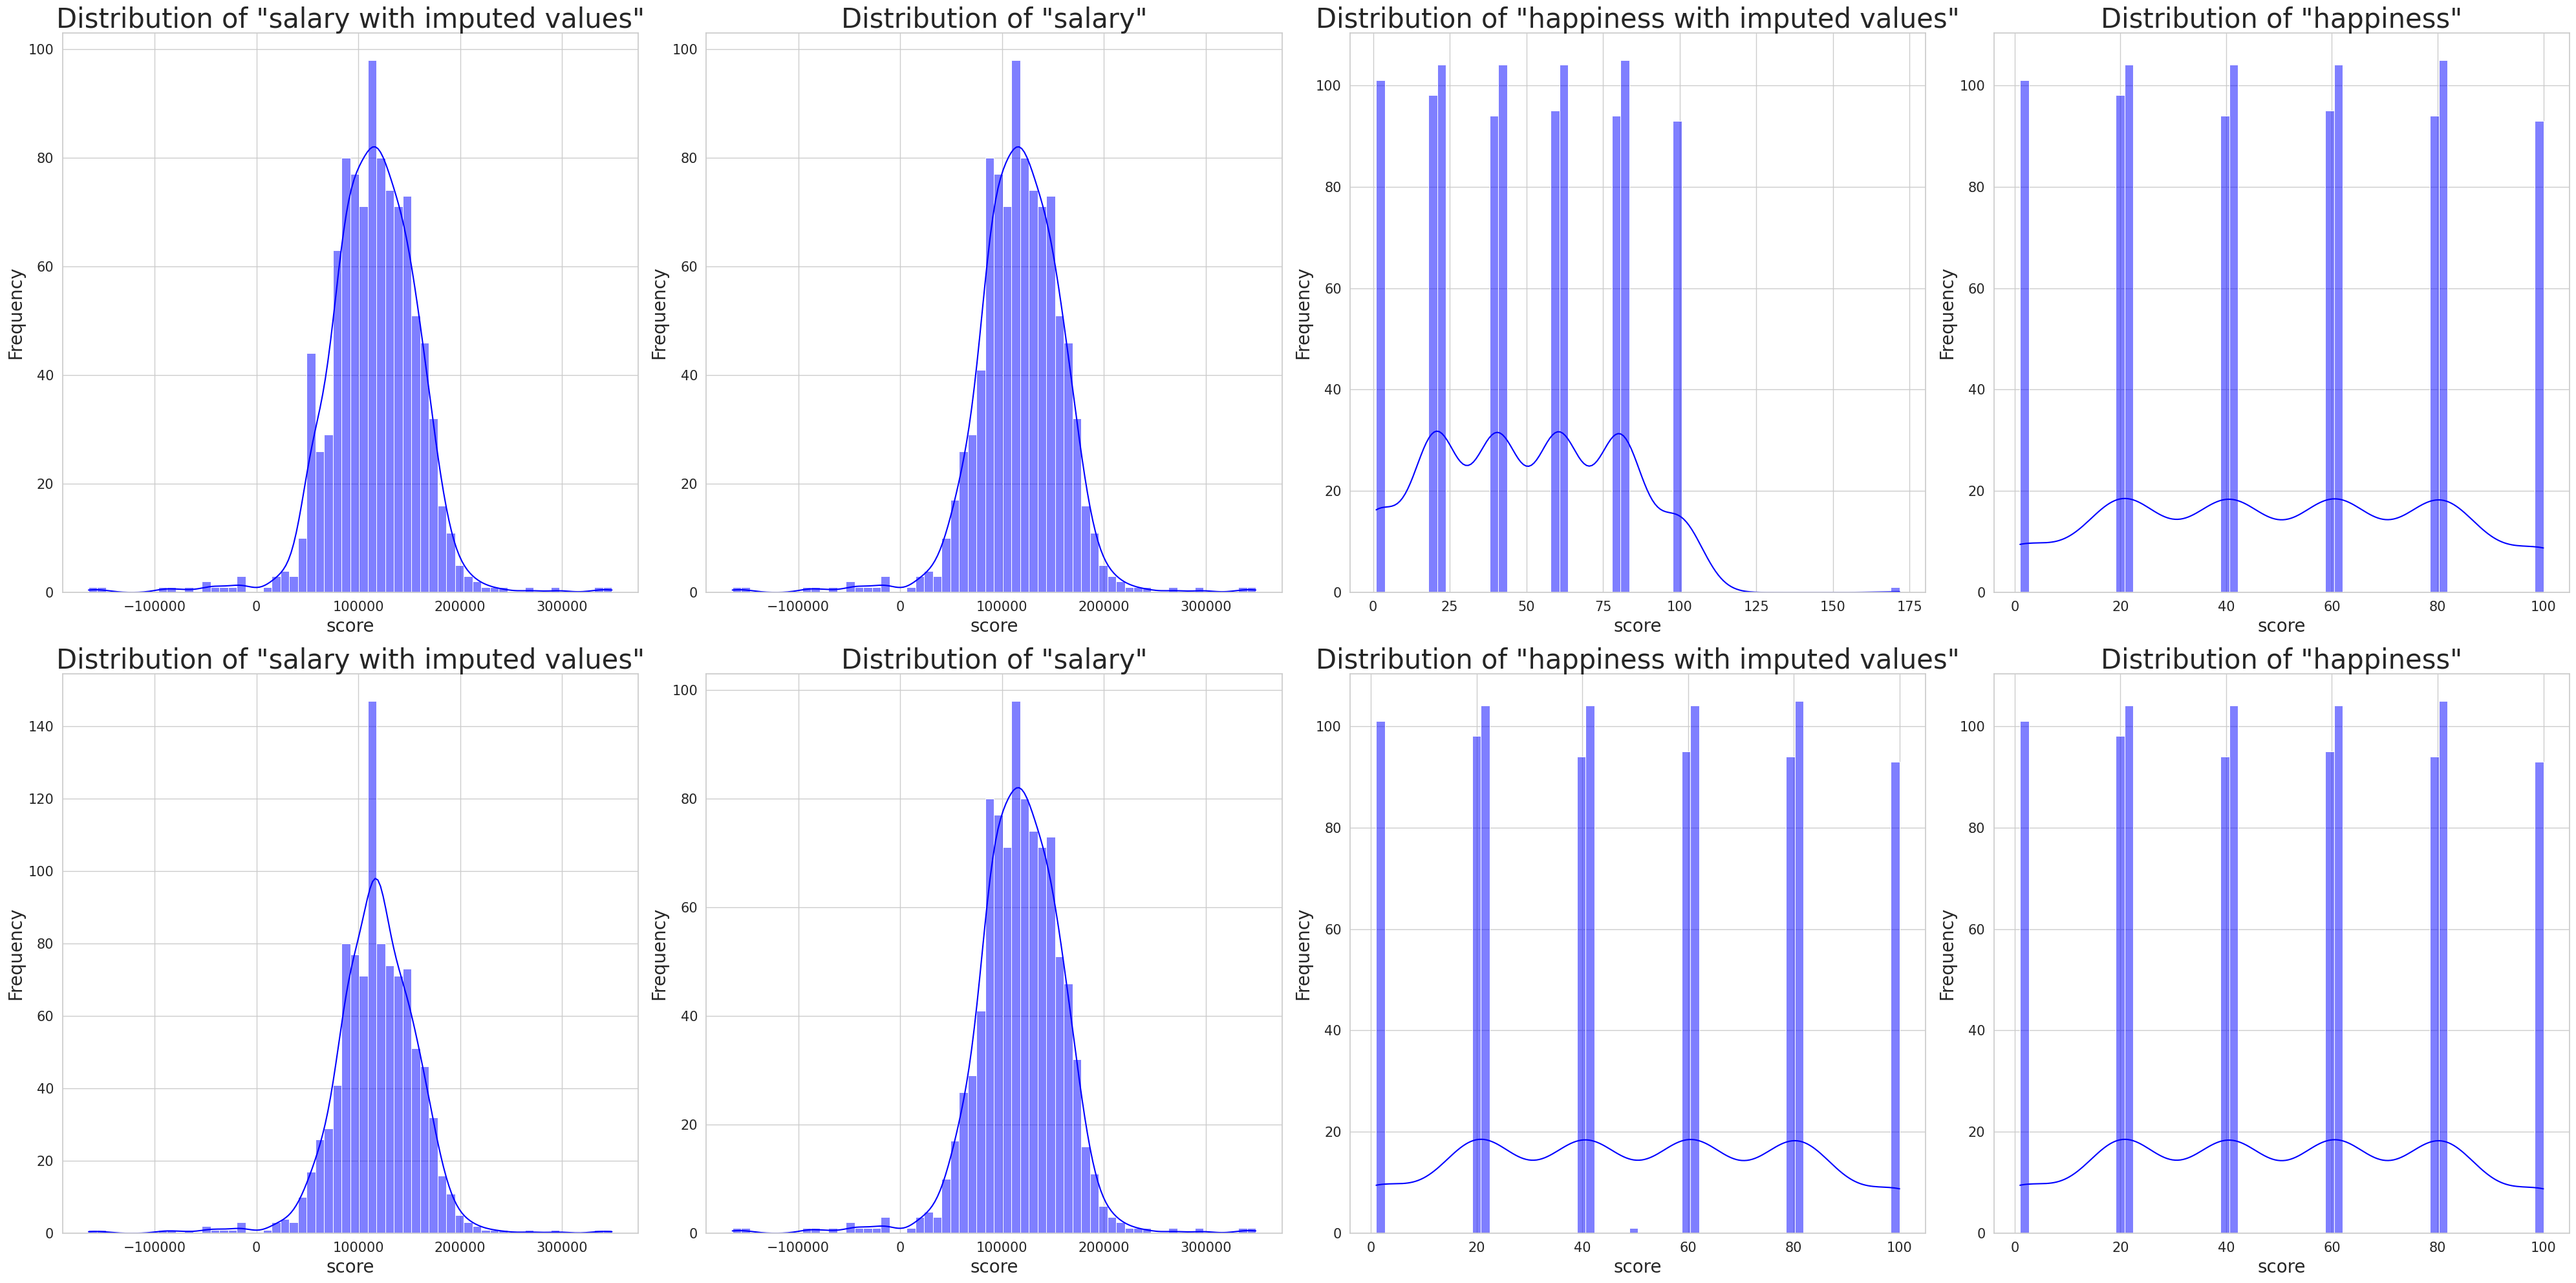

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

# First row
plt.subplot(2, 4, 1)
sns.histplot(df_imputed["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 2)
sns.histplot(base_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 3)
sns.histplot(df_imputed["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 4)
sns.histplot(base_df["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Second row
plt.subplot(2, 4, 5)
sns.histplot(df_simple_imputed["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 6)
sns.histplot(base_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 7)
sns.histplot(df_simple_imputed["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 4, 8)
sns.histplot(base_df["happiness"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "happiness"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

These images show the distributions after the imputations, on the first row with the IterativeImputer, in the second row with the SimpleImputer. The imputed value for happiness from the IterativeImputer is very high, which can be explained because of the corresponding high salary value of the row. There is a high correlation between those two features, which explains, why the Imputer predicted this high value. However, we assume from domain knowledge that the value of happiness can´t surpass 100, which is why we are going to change this value to 100 in the next cell.
However in general, the IterativeImputer seems to perform better here, the normal distribution of tthe "salary" feature is much better resembled than with the values from the SimpleImputer.

In [36]:
max_index = df_imputed["happiness"].idxmax()
df_imputed.loc[max_index, "happiness"] = 100
print(df_imputed.loc[max_index])

score            50.000000
salary       349110.332462
happiness       100.000000
Age              25.000000
Name: 100, dtype: float64


In [37]:
#df_imputed.to_csv("data_1_imputed.csv")